In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from packaging.version import parse


In [98]:
df= pd.read_csv("churn_cleaned.csv")

In [99]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [100]:
df.info() #checking all features are int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
 12  Gender_Female      10000 non-null  int64  
 13  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [101]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [102]:
##independent and dependent features
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [103]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [104]:
x_train.shape


(8000, 13)

In [105]:
x_test.shape

(2000, 13)

In [106]:
x_train.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.007253,-0.007670,0.006758,0.019402,-0.013145,0.028217,-0.002628,-0.009393,0.003082,0.007766,0.003459,-0.003459
Age,-0.007253,1.000000,-0.008788,0.027782,-0.033875,-0.020440,0.088123,-0.000997,-0.037663,0.042562,0.000851,0.028496,-0.028496
Tenure,-0.007670,-0.008788,1.000000,-0.011748,0.018448,0.020439,-0.023162,0.022071,-0.000996,-0.002179,0.003336,-0.013163,0.013163
Balance,0.006758,0.027782,-0.011748,1.000000,-0.297601,-0.015655,-0.022086,0.011984,-0.232534,0.407698,-0.140053,-0.010937,0.010937
NumOfProducts,0.019402,-0.033875,0.018448,-0.297601,1.000000,0.003504,0.019543,0.013162,0.000297,-0.012226,0.011916,0.019426,-0.019426
HasCrCard,-0.013145,-0.020440,0.020439,-0.015655,0.003504,1.000000,-0.011913,-0.012799,0.003953,0.006474,-0.011059,-0.004031,0.004031
IsActiveMember,0.028217,0.088123,-0.023162,-0.022086,0.019543,-0.011913,1.000000,-0.009852,0.000538,-0.022564,0.022002,-0.020282,0.020282
EstimatedSalary,-0.002628,-0.000997,0.022071,0.011984,0.013162,-0.012799,-0.009852,1.000000,-0.003266,0.011955,-0.008212,0.016708,-0.016708
Geography_France,-0.009393,-0.037663,-0.000996,-0.232534,0.000297,0.003953,0.000538,-0.003266,1.000000,-0.578599,-0.575524,0.000868,-0.000868
Geography_Germany,0.003082,0.042562,-0.002179,0.407698,-0.012226,0.006474,-0.022564,0.011955,-0.578599,1.000000,-0.333998,0.018806,-0.018806


<Axes: >

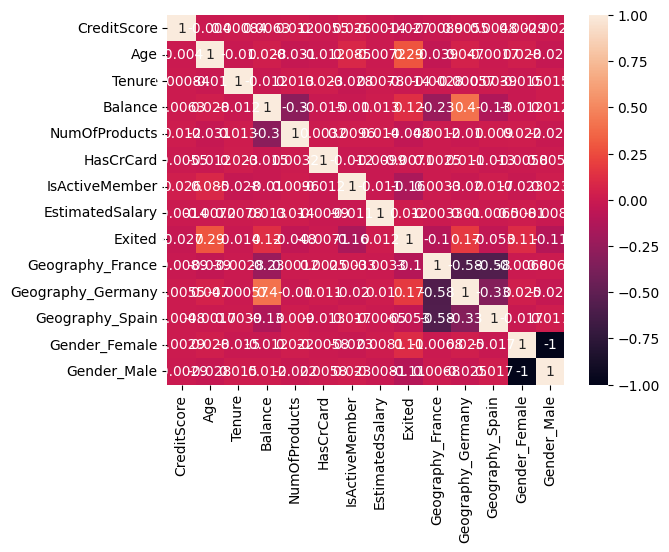

In [107]:
sns.heatmap(df.corr(),annot=True)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

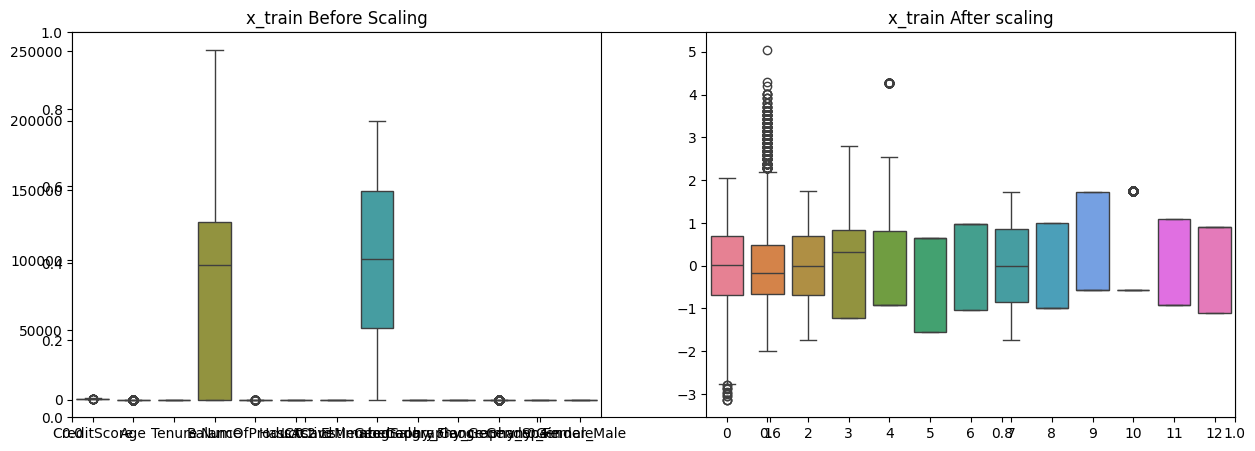

In [109]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data= x_train_scaled)
plt.title('x_train After scaling')
plt.show()

In [110]:
from imblearn.over_sampling import SMOTE


In [111]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

In [112]:
y_train_balanced.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

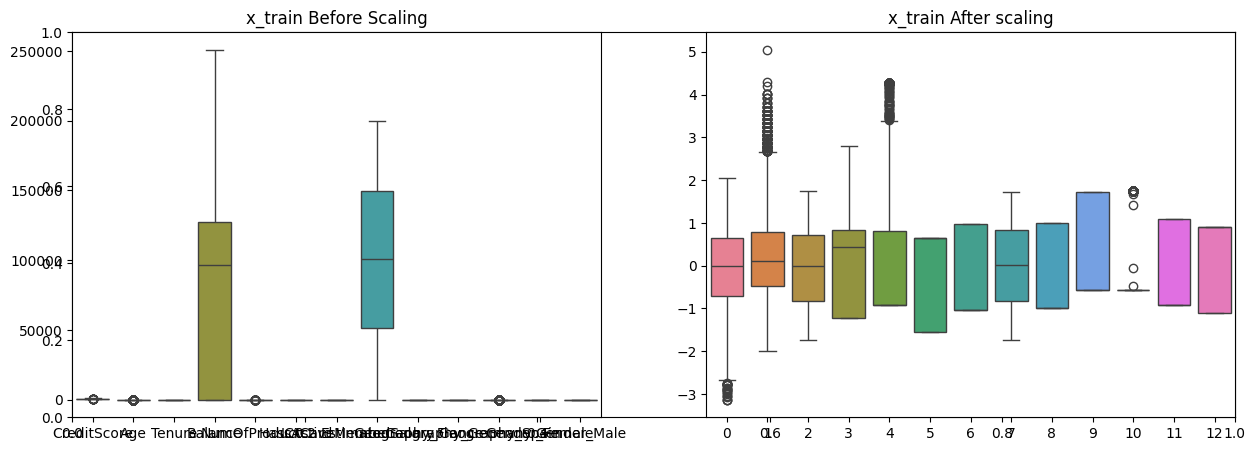

In [113]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data= x_train_balanced)
plt.title('x_train After scaling')
plt.show()

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train_balanced, y_train_balanced)
y_pred = model.predict(x_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



Text(0.5, 1.0, 'Confusion Matrix')

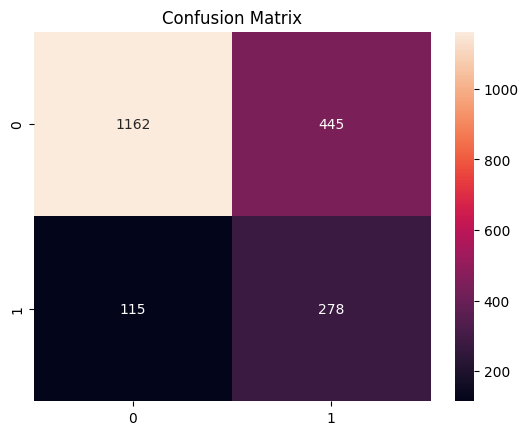

In [115]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(x_train_balanced, y_train_balanced)
y_pred=rf.predict(x_test_scaled)
print("RandomForest:", rf.score(x_test_scaled, y_test))
print(classification_report(y_test, y_pred))




RandomForest: 0.839
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.60      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [117]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [118]:
y_train_pred=rf.predict(x_train_balanced)
y_test_pred=rf.predict(x_test_scaled)

In [119]:
model_train_accuracy = accuracy_score(y_train_balanced, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train_balanced, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train_balanced, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train_balanced, y_train_pred)


# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

In [120]:
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8390
- F1 score: 0.8398
- Precision: 0.5881
- Recall: 0.6031
- Roc Auc Score: 0.7499


Text(0.5, 1.0, 'Confusion Matrix')

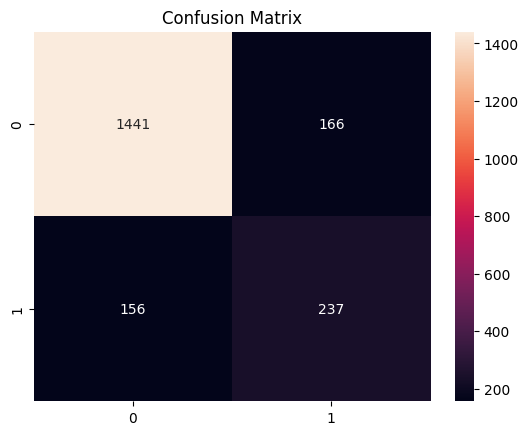

In [121]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [123]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_balanced, y_train_balanced) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train_balanced)
    y_test_pred = model.predict(x_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_balanced, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_balanced, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_balanced, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_balanced, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7070
- F1 score: 0.7070
- Precision: 0.7108
- Recall: 0.6982
- Roc Auc Score: 0.7070
----------------------------------
Model performance for Test set
- Accuracy: 0.7200
- F1 score: 0.7454
- Precision: 0.3845
- Recall: 0.7074
- Roc Auc Score: 0.7152


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7785
- F1 score: 0.7877
- Precision: 0.4496
- Recall: 0.5674
- Roc Auc Score: 0.6988


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8405
- F1 score: 0.8409
- Precision: 0.5930
- Recall: 0.6005
- Roc Auc Score: 0.7498


Gradient Boost
Model performance for Training se

In [124]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
gradient_boost_params = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "max_depth": [3, 4, 5, 6, 8],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "subsample": [0.8, 0.9, 1.0],
    "max_features": ["sqrt", "log2", None]
}

In [125]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("GB", GradientBoostingClassifier(), gradient_boost_params)
                   
                   ]

In [126]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('GB',
  GradientBoostingClassifier(),
  {'n_estimators': [100, 200, 300, 400],
   'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
   'max_depth': [3, 4, 5, 6, 8],
   'min_samples_split': [2, 5, 10, 20],
   'min_samples_leaf': [1, 2, 5, 10],
   'subsample': [0.8, 0.9, 1.0],
   'max_features': ['sqrt', 'log2', None]})]

In [127]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train_balanced, y_train_balanced)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\BITPATNA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BITPATNA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\BITPATNA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}
---------------- Best Params for GB -------------------
{'subsample': 0.9, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8, 'learning_rate': 0.15}


In [132]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    "Gradient Boost":GradientBoostingClassifier(subsample= 0.9, n_estimators= 200, min_samples_split= 20, min_samples_leaf= 5,
                                   max_features='log2', max_depth=8, learning_rate= 0.1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_balanced, y_train_balanced) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train_balanced)
    y_test_pred = model.predict(x_test_scaled)
    y_train_prob = model.predict_proba(x_train_balanced)[:, 1]
    y_test_prob = model.predict_proba(x_test_scaled)[:, 1]

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_balanced, y_train_pred) 
    model_train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted') 
    model_train_precision = precision_score(y_train_balanced, y_train_pred)
    model_train_recall = recall_score(y_train_balanced, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train_balanced, y_train_prob)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_prob)


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8415
- F1 score: 0.8417
- Precision: 0.5960
- Recall: 0.6005
- Roc Auc Score: 0.8479


Gradient Boost
Model performance for Training set
- Accuracy: 0.9904
- F1 score: 0.9904
- Precision: 0.9944
- Recall: 0.9863
- Roc Auc Score: 0.9997
----------------------------------
Model performance for Test set
- Accuracy: 0.8485
- F1 score: 0.8449
- Precision: 0.6293
- Recall: 0.5573
- Roc Auc Score: 0.8451




Text(0.5, 1.0, 'Confusion Matrix')

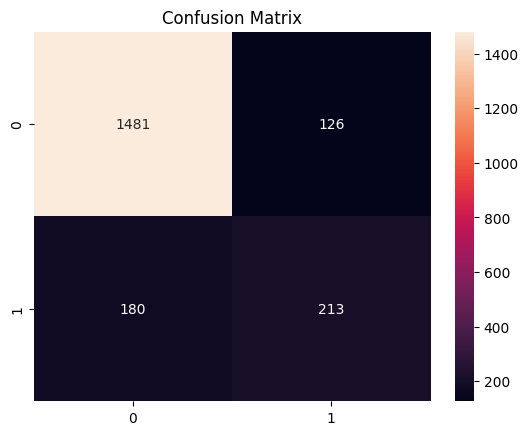

In [129]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')

0.8490921556612214
0.8480439426111273


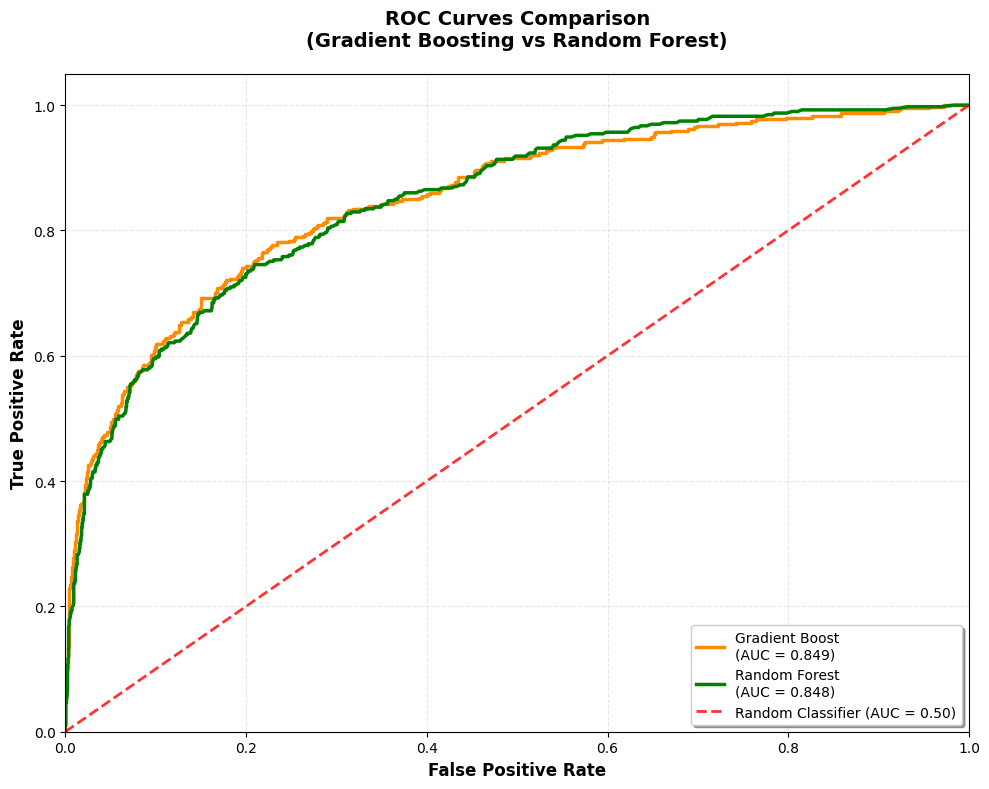

In [133]:
plt.figure(figsize=(10, 8))

# Add your top models with accurate titles
auc_models = [
    {
        'label': 'Gradient Boost',
        'model': GradientBoostingClassifier(subsample= 0.9, n_estimators= 200, min_samples_split= 20, min_samples_leaf= 5,
                                   max_features='log2', max_depth=8, learning_rate= 0.1
        ),
        'color': 'darkorange'
    },
    {
        'label': 'Random Forest', 
        'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
        'color': 'green'
    }
]

# Train & plot each model
for algo in auc_models:
    model = algo['model']
    model.fit(x_train_balanced, y_train_balanced)
    
    # Get prediction probabilities & calculate ACTUAL AUC
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    print(auc_score)
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Plot with custom styling
    plt.plot(fpr, tpr, 
             color=algo['color'], 
             lw=2.5, 
             label=f'{algo["label"]}\n(AUC = {auc_score:.3f})')

# Add diagonal baseline & styling
plt.plot([0, 1], [0, 1], 'r--', lw=2, alpha=0.8, label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Professional labels & styling
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves Comparison\n(Gradient Boosting vs Random Forest)', 
          fontsize=14, fontweight='bold', pad=20)

# Legend & grid
plt.legend(loc="lower right", frameon=True, fancybox=True, shadow=True, fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [169]:
import pickle
pickle.dump(models["Random Forest"], open('Random_forest.pkl', 'wb'))

In [172]:
import joblib
joblib.dump(models['Random Forest'], "RF.pkl", compress=9)


['RF.pkl']

In [ ]:
model = pickle.load(open('RF.pkl', 'rb'))

In [173]:
# Copy this EXACT array into app.py for testing
low_risk = np.array([[750, 35, 8, 0, 2, 1, 1, 120000, 1, 0, 0, 0, 0]])
print("Low risk prediction:", model.predict_proba(low_risk)[0][1])  # Should be <0.5


Low risk prediction: 0.518


In [149]:
x_train_balanced = pd.DataFrame(x_train_balanced, columns=X.columns)


In [150]:
x_train_balanced = pd.DataFrame(
    x_train_balanced,
    columns=x_train.columns
)


In [151]:
print(x_train_balanced.columns.tolist())


['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
